# Health Data - Elizabeth Ashley Flack
Original data is available on [Google Sheets](https://docs.google.com/spreadsheets/d/1vaXOXPluOg_lg0uqKC-qLBt6odL0GPFPcYzOP2vbaiM/edit#gid=1309334105).

In [314]:
# Juptyer Notebook Settings
options(repr.plot.width=5, repr.plot.height=5)  # plot size, inches

## I. Load Semi-Raw Data
This data has already been somewhat wrangled in that secondary variables (namespaced as `Indicator.SECONDARY_VARIABLE_NAME`) have been created.

In [315]:
dat = read.csv("data/Health Data - Elizabeth Ashley Flack.csv", header = TRUE)
tail(dat)

,Date,Weekday,Notes.Unstructured,Med.AntiDepressant.Wellbutrin,Med.AntiDepressant.Celexa,Med.AntiPsychotic.Zyprexa,Med.MoodStabilizer.Topamax,Med.AntiAnxiety.Vistaril,Med.Other.MigrainePill,Symptom.Headache,⋯,Indicator.Health,Indicator.Experience..,Indicator.Experience...1,Indicator.Experience,Indicator.SelfEfficacy,Indicator.Productivity,Indicator.Wellbeing,Indicator.Utility..,Indicator.Utility...1,Indicator.Utility
95,1/3/18,4,"Food diary (FD), G (Gym).",0,40,0,0,75,0,0,⋯,0,0,0,0,0.23,0,0.1,0,0,0.08
96,1/4/18,5,,0,40,0,0,75,NA,NA,⋯,0,0,0,0,0.00,0,0.0,0,0,0.00
97,1/5/18,6,,0,40,0,0,75,NA,NA,⋯,0,0,0,0,0.00,0,0.0,0,0,0.00
98,1/6/18,7,,0,40,0,0,75,NA,NA,⋯,0,0,0,0,0.00,0,0.0,0,0,0.00
99,1/7/18,1,,0,40,0,0,75,NA,NA,⋯,0,0,0,0,0.00,0,0.0,0,0,0.00
100,1/8/18,2,,0,40,0,0,75,NA,NA,⋯,0,0,0,0,0.00,0,0.0,0,0,0.00


## II. Explore Semi-Raw Data

In [316]:
summary(dat)

      Date       Weekday    
 1/1/18 : 1   Min.   :1.00  
 1/2/18 : 1   1st Qu.:2.00  
 1/3/18 : 1   Median :4.00  
 1/4/18 : 1   Mean   :3.95  
 1/5/18 : 1   3rd Qu.:6.00  
 1/6/18 : 1   Max.   :7.00  
 (Other):94                 
                                      Notes.Unstructured
                                               :20      
 Migraine pill.                                : 4      
 Bedridden.                                    : 3      
 Cleaning house.                               : 3      
 Food diary.                                   : 3      
 1hr convo w/ volunteer coordinator at library.: 1      
 (Other)                                       :66      
 Med.AntiDepressant.Wellbutrin Med.AntiDepressant.Celexa
 Min.   :  0.0                 Min.   :30.0             
 1st Qu.:  0.0                 1st Qu.:30.0             
 Median :150.0                 Median :30.0             
 Mean   :100.5                 Mean   :33.3             
 3rd Qu.:150.0             

In [317]:
sapply(dat, typeof)

Date                              Weekday 
                           "integer"                            "integer" 
                  Notes.Unstructured        Med.AntiDepressant.Wellbutrin 
                           "integer"                            "integer" 
           Med.AntiDepressant.Celexa            Med.AntiPsychotic.Zyprexa 
                           "integer"                            "integer" 
          Med.MoodStabilizer.Topamax             Med.AntiAnxiety.Vistaril 
                           "integer"                            "integer" 
              Med.Other.MigrainePill                     Symptom.Headache 
                           "integer"                            "integer" 
                     Symptom.Episode                   Symptom.Depression 
                           "integer"                            "integer" 
                     Symptom.Anxiety                     Symptom.Paranoia 
                           "integer"                            "integer" 
                      Symptom.Stress                 Symptom.SleepTrouble 
                           "integer"                            "integer" 
                     Symptom.NoSleep                     Symptom.NoEnergy 
                           "integer"                            "integer" 
                   Symptom.Bedridden                        Symptom.Mania 
                           "integer"                            "integer" 
                      Symptom.Crying                  Symptom.Detatchment 
                           "integer"                            "integer" 
                   Symptom.ChestPain                    Experience.Period 
                           "integer"                            "integer" 
Experience.NegativeSocialInteraction           Experience.MaritalConflict 
                           "integer"                            "integer" 
                   Activity.Exercise                  Activity.Meditation 
                           "integer"                            "integer" 
                        Activity.Sex                       Activity.Drive 
                           "integer"                            "integer" 
  Activity.PositiveSocialInteraction                   Activity.FoodDiary 
                           "integer"                            "integer" 
             Indicator.Health.Mood..            Indicator.Health.Mood...1 
                           "integer"                             "double" 
           Indicator.Health.Energy..          Indicator.Health.Energy...1 
                           "integer"                             "double" 
           Indicator.Health.Mental..          Indicator.Health.Mental...1 
                            "double"                            "integer" 
         Indicator.Health.Physical..        Indicator.Health.Physical...1 
                            "double"                            "integer" 
                  Indicator.Health..                 Indicator.Health...1 
                            "double"                            "integer" 
                    Indicator.Health               Indicator.Experience.. 
                            "double"                             "double" 
            Indicator.Experience...1                 Indicator.Experience 
                           "integer"                             "double" 
              Indicator.SelfEfficacy               Indicator.Productivity 
                            "double"                            "integer" 
                 Indicator.Wellbeing                  Indicator.Utility.. 
                            "double"                            "integer" 
               Indicator.Utility...1                    Indicator.Utility 
                           "integer"                             "double"

## III. Clean Data

### III.1 Convert read.csv() Listto Data Frame

In [318]:
df <- data.frame(dat)
df$Date[1]

[1] 10/1/17
100 Levels: 1/1/18 1/2/18 1/3/18 1/4/18 1/5/18 1/6/18 1/7/18 1/8/18 ... 12/9/17

### III.2 Drop unneeded columns

In [319]:
df$Date[1]
drops <- c("Notes.Unstructured")
df <- df[ , !(names(df) %in% drops)]
df$Date[1]

[1] 10/1/17
100 Levels: 1/1/18 1/2/18 1/3/18 1/4/18 1/5/18 1/6/18 1/7/18 1/8/18 ... 12/9/17

[1] 10/1/17
100 Levels: 1/1/18 1/2/18 1/3/18 1/4/18 1/5/18 1/6/18 1/7/18 1/8/18 ... 12/9/17

### III.3 Remove any rows with missing values

In [320]:
df$Date[1]
nrow(df)
str(colSums(is.na(df)))
str(colSums(!is.na(df)))
df <- df[complete.cases(df), ]
nrow(df)

[1] 10/1/17
100 Levels: 1/1/18 1/2/18 1/3/18 1/4/18 1/5/18 1/6/18 1/7/18 1/8/18 ... 12/9/17

[1] 100

 Named num [1:51] 0 0 0 0 0 0 0 5 5 5 ...
 - attr(*, "names")= chr [1:51] "Date" "Weekday" "Med.AntiDepressant.Wellbutrin" "Med.AntiDepressant.Celexa" ...
 Named num [1:51] 100 100 100 100 100 100 100 95 95 95 ...
 - attr(*, "names")= chr [1:51] "Date" "Weekday" "Med.AntiDepressant.Wellbutrin" "Med.AntiDepressant.Celexa" ...


[1] 95

### IV.4 Streamline Data Types

In [321]:
df$Date[1]
typeof(df$Date)
class(df$Date)
df$Date <- as.Date(df$Date, format='%m/%d/%Y')
class(df$Date)
typeof(df$Date)
df$Date[1]

[1] 10/1/17
100 Levels: 1/1/18 1/2/18 1/3/18 1/4/18 1/5/18 1/6/18 1/7/18 1/8/18 ... 12/9/17

[1] "integer"

[1] "factor"

[1] "Date"

[1] "double"

[1] "0017-10-01"

## IV. Explore Clean Data

In [322]:
summary(df)

      Date               Weekday      Med.AntiDepressant.Wellbutrin
 Min.   :0017-10-01   Min.   :1.000   Min.   :  0.0                
 1st Qu.:0017-10-24   1st Qu.:2.000   1st Qu.:  0.0                
 Median :0017-11-17   Median :4.000   Median :150.0                
 Mean   :0017-11-17   Mean   :3.937   Mean   :105.8                
 3rd Qu.:0017-12-10   3rd Qu.:6.000   3rd Qu.:150.0                
 Max.   :0018-01-03   Max.   :7.000   Max.   :150.0                
 Med.AntiDepressant.Celexa Med.AntiPsychotic.Zyprexa Med.MoodStabilizer.Topamax
 Min.   :30.00             Min.   :0                 Min.   :  0.00            
 1st Qu.:30.00             1st Qu.:0                 1st Qu.: 50.00            
 Median :30.00             Median :0                 Median : 75.00            
 Mean   :32.95             Mean   :0                 Mean   : 64.74            
 3rd Qu.:40.00             3rd Qu.:0                 3rd Qu.: 75.00            
 Max.   :40.00             Max.   :0        

## V. Analyses

### V.1 Simple Plots
#### Data Visualization Reference Info
##### Ggplot2
Tutorial: http://www.cookbook-r.com/Graphs/Bar_and_line_graphs_(ggplot2)/

Options for `geom_line()`
- Line type, e.g. `linetype='dashed'`
- Line color, e.g. `color='red'`

#### Presence of any headache on weekday for timespan of entire dataset

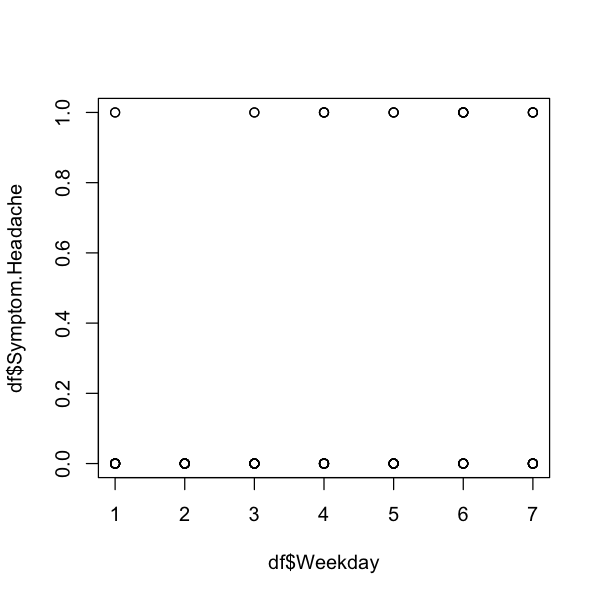

In [323]:
lm1 <- lm(Symptom.Headache ~ Weekday, data=df)
plot(df$Weekday, df$Symptom.Headache)

#### Health over time

Warning message:
“The plyr::rename operation has created duplicates for the following name(s): (`colour`)”

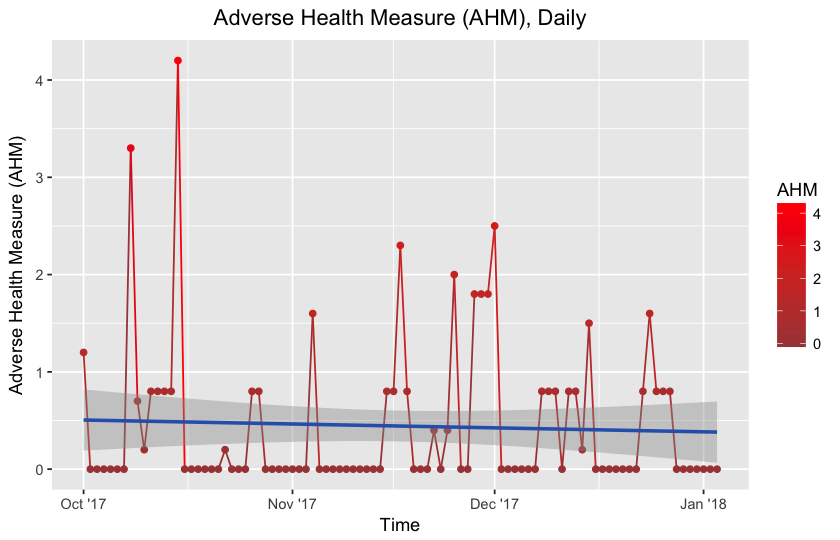

In [378]:
library(ggplot2)
var <- df$Indicator.Health
time <- df$Date

# a_lm <- lm(-10*Indicator.Health ~ Date, data=df)
# plot(df$Date, df$Indicator.Health)
# lines(df$Date, a_lm$fitted)

# Basic line plot with points
options(repr.plot.width=7, repr.plot.height=4.5)  # (1) Jupyter Notebook plot size, inches
# ggplot(data=df, aes(x=time, y=-10*(var), colour=(-10*var), group=1)) + geom_line()+ geom_point() + 
ggplot(data=df, aes(x=time, y=-10*(var), colour=(-10*var), color=qsec, group=1)) + geom_line()+ geom_point() + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  scale_color_gradient(low="#AA4444", high="#ff0000") + 
  scale_x_date(date_breaks='1 month', date_labels="%b '%y") + 
  stat_smooth(method='lm', col='#2e64ba') + 
  labs(x='Time', y='Adverse Health Measure (AHM)', title='Adverse Health Measure (AHM), Daily', colour='AHM')
options(repr.plot.width=7, repr.plot.height=7)  # (1) default

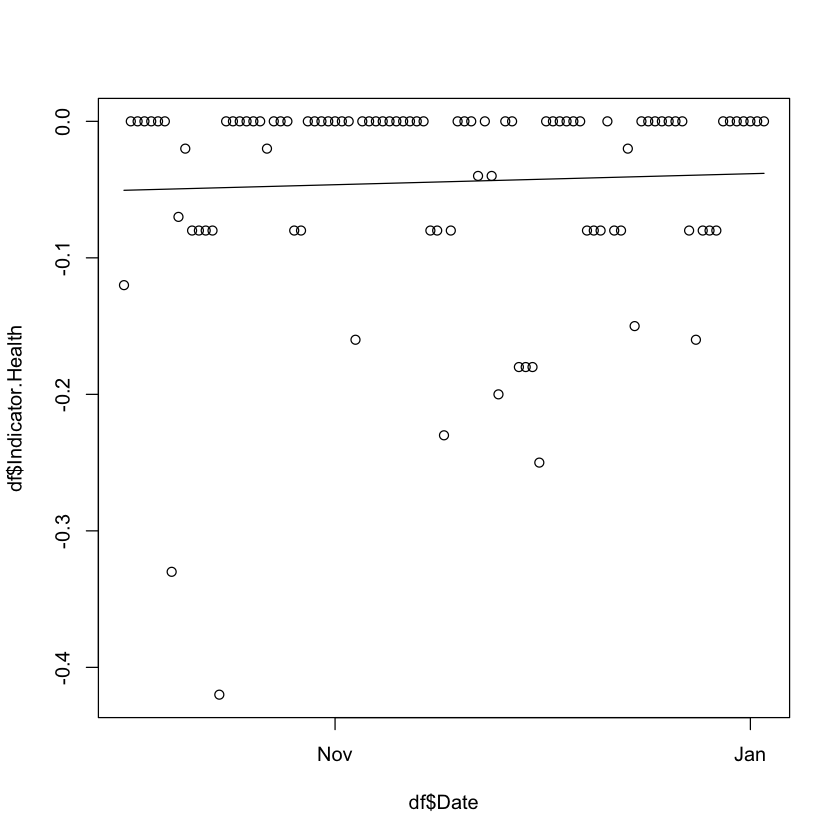

In [341]:
a_lm <- lm(Indicator.Health ~ Date, data=df)
plot(df$Date, df$Indicator.Health)
lines(df$Date, a_lm$fitted)

### V.2 Linear Models

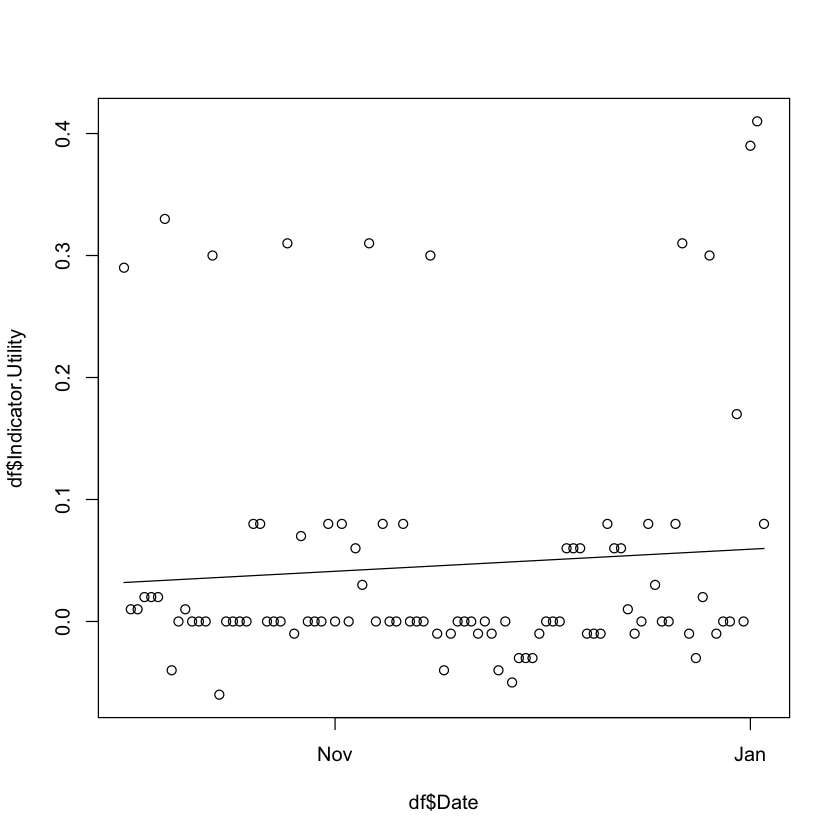

In [332]:
a_lm <- lm(Indicator.Utility ~ Date, data=df)
plot(df$Date, df$Indicator.Utility)
lines(df$Date, a_lm$fitted)

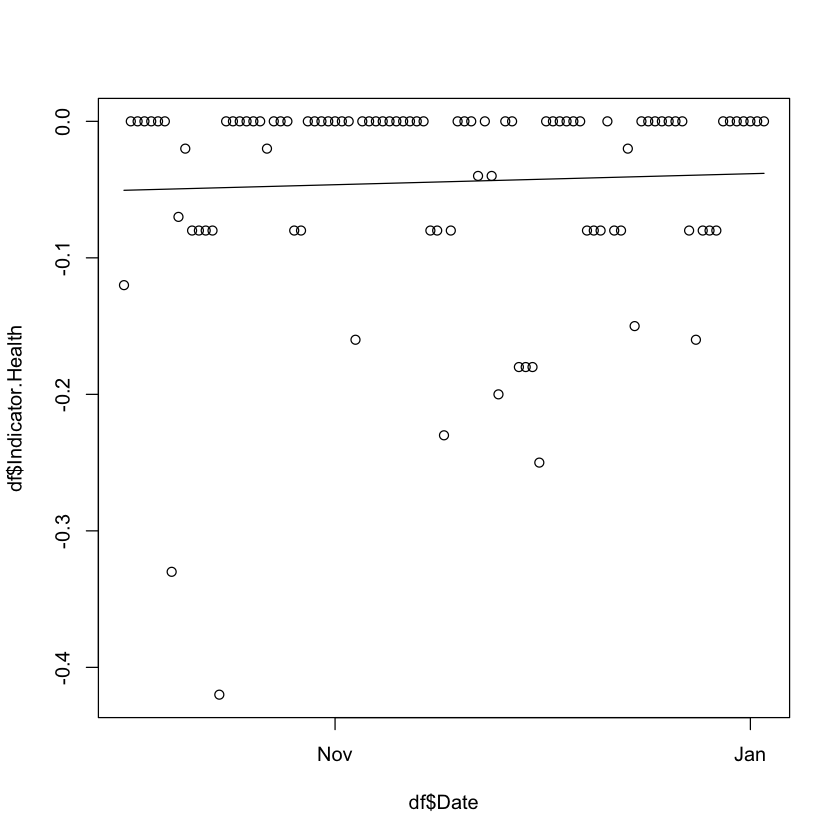

In [331]:
a_lm <- lm(Indicator.Health ~ Date, data=df)
plot(df$Date, df$Indicator.Health)
lines(df$Date, a_lm$fitted)

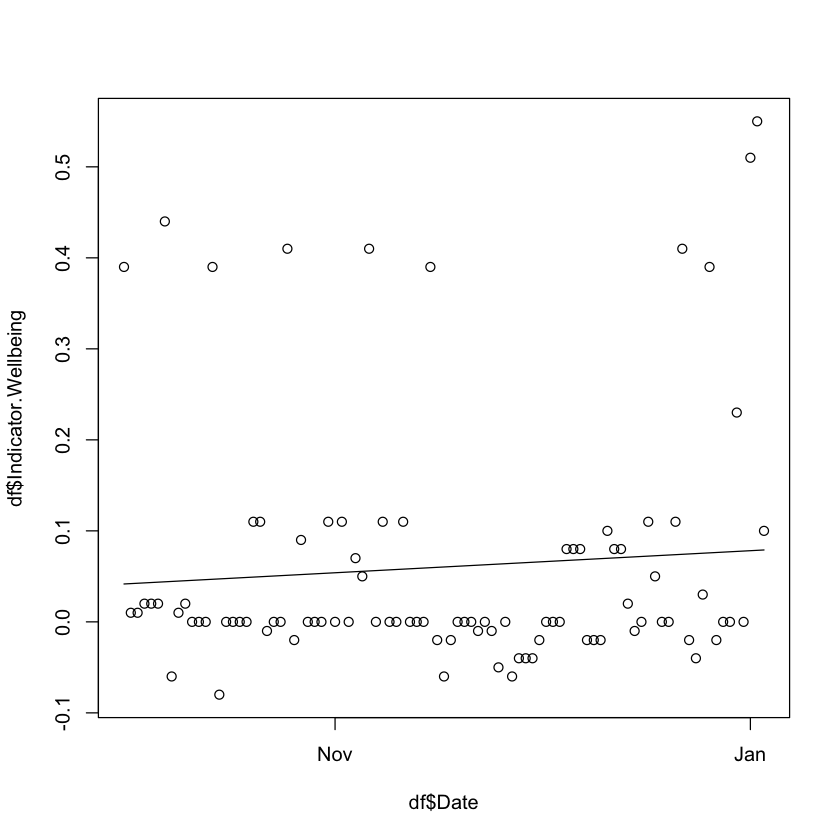

In [330]:
a_lm <- lm(Indicator.Wellbeing ~ Date, data=df)
plot(df$Date, df$Indicator.Wellbeing)
lines(df$Date, a_lm$fitted)